In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/chia_cluster/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/chia_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/chia_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_4',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_4',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.45_.5_.55_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/chia_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_4',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_4',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.45_.5_.55_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1100

nband = 115

nv = 200

dv = 0.005

tsfc = 294.0

ng = 4

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 4 /)

data wgt
     &     /.45, .5, .55, .95/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 5e-25

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

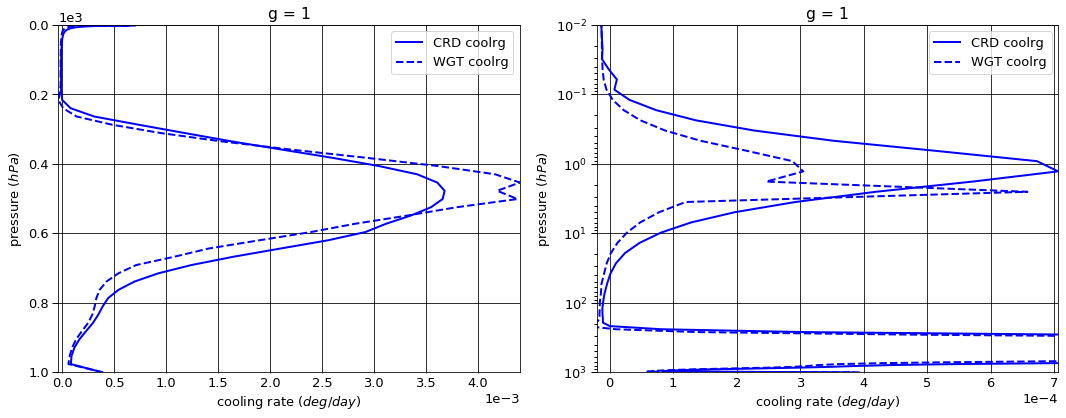

# Figure: cooling rate g-group 2

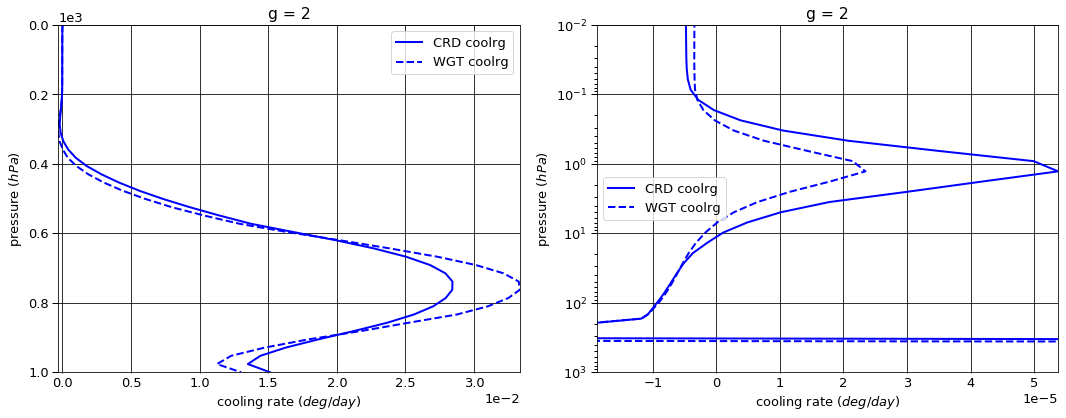

# Figure: cooling rate g-group 3

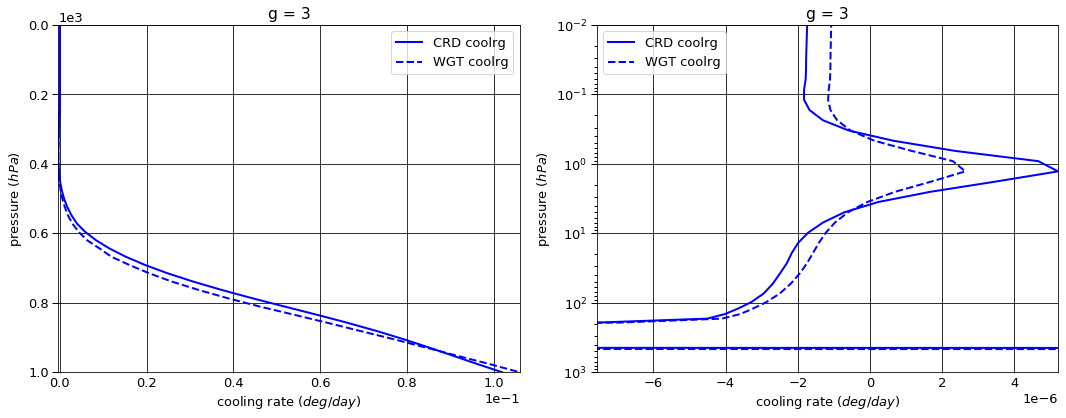

# Figure: cooling rate g-group 4

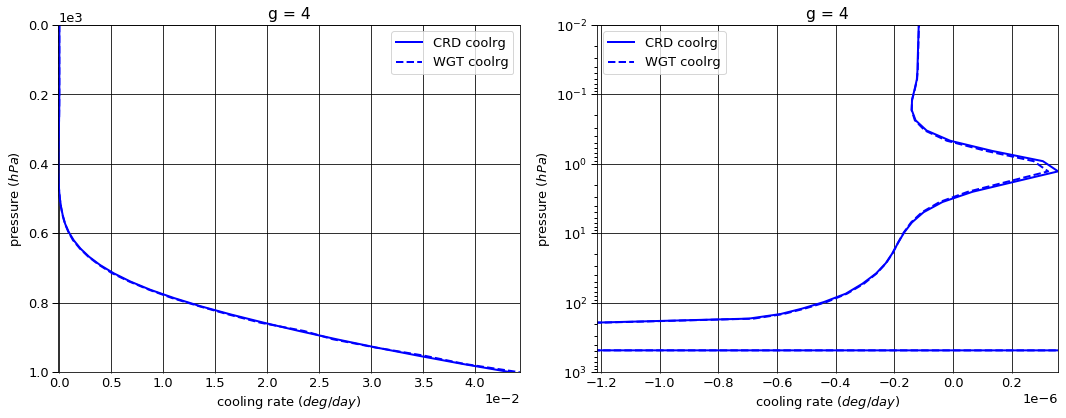

# Figure: cooling rate g-group total

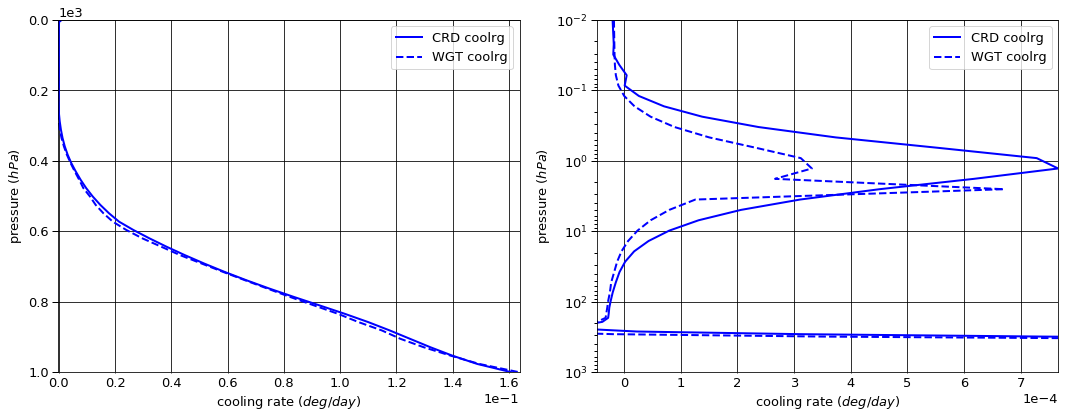

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.145643  0.000000  -0.145643
  1013.0   76     -0.353340  0.352288  -0.001051
2 0.0      1      -1.400618  0.000000  -1.400618
  1013.0   76     -2.025206  1.910424  -0.114781
3 0.0      1      -7.564058  0.000000  -7.564058
  1013.0   76     -8.094364  3.089370  -5.004994
4 0.0      1     -12.668144  0.000000 -12.668144
  1013.0   76    -12.796750  0.946521 -11.850229


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.141272  0.000000  -0.141272
  1013.0   76     -0.353340  0.352301  -0.001039
2 0.0      1      -1.396436  0.000000  -1.396436
  1013.0   76     -2.025206  1.958201  -0.067005
3 0.0      1      -7.627564  0.000000  -7.627564
  1013.0   76     -8.094364  2.881868  -5.212496
4 0.0      1     -12.670348  0.000000 -12.670348
  1013.0   76    -12.796750  0.944490 -11.852260


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.004370  0.000000  0.004370
  1013.0   76     0.000000  0.000013  0.000013
2 0.0      1      0.004182  0.000000  0.004182
  1013.0   76     0.000000  0.047776  0.047776
3 0.0      1     -0.063506  0.000000 -0.063506
  1013.0   76     0.000000 -0.207502 -0.207502
4 0.0      1     -0.002204  0.000000 -0.002204
  1013.0   76     0.000000 -0.002032 -0.002031

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.853379e-05
  1001.112500 75     3.845632e-04
2 0.000312    1     -4.804954e-06
  1001.112500 75     1.513513e-02
3 0.000312    1     -1.658818e-06
  1001.112500 75     1.019938e-01
4 0.000312    1     -1.088419e-07
  1001.112500 75     4.345772e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.459296e-05
  1001.112500 75     3.939514e-04
2 0.000312    1     -3.350460e-06
  1001.112500 75     1.302841e-02
3 0.000312    1     -1.019264e-06
  1001.112500 75     1.060367e-01
4 0.000312    1     -1.078572e-07
  1001.112500 75     4.429536e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      3.940827e-06
  1001.112500 75     9.388140e-06
2 0.000312    1      1.454493e-06
  1001.112500 75    -2.106722e-03
3 0.000312    1      6.395542e-07
  1001.112500 75     4.042830e-03
4 0.000312    1      9.846700e-10
  1001.112500 75     8.376410e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.778462,0.000000,-21.778462
1013.0,76,-23.269659,6.298604,-16.971056



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.835620,0.000000,-21.83562
1013.0,76,-23.269659,6.136859,-17.13280



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.057158,0.000000,-0.057158
1013.0,76,0.000000,-0.161745,-0.161744


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000025
1001.112500,75,0.160971



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000019
1001.112500,75,0.163754



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000006
1001.112500,75,0.002783


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.015957,0.014906
2,0.089391,0.086202
3,0.357652,0.344282
4,0.537000,0.554611


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.089438e-22
2,7.380948e-24
3,5.000596e-25
4,3.773541e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [4]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.089438e-22,NaN,0.015957,0.014906,0.015957,0.014906,600.0
2,7.380948e-24,0.067750,0.089391,0.086202,0.105348,0.101108,600.0
3,5.000596e-25,0.067750,0.357652,0.344282,0.463000,0.445389,600.0
4,3.773541e-26,0.075462,0.537000,0.554611,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
absmean_absmeanlog = pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1, 2],
                sep=r'\s+')

taulyr = pd.read_csv(os.path.join(crd.rundir, 'output_taulyr.dat'),
                     index_col=[0, 1, 2],
                     sep=r'\s+')


pd.set_option('display.max_rows', None)
display.display( 
    pd.concat([absmean_absmeanlog, taulyr], axis=1)
    )
pd.reset_option('display.max_rows')



absmean    absmeanlog      ratio        taulyr
layer g pressure                                                        
1     1 0.000312     2.357810e-22  5.721667e-24  41.208439  9.303715e-09
      2 0.000312     3.217788e-24  1.336866e-25  24.069640  1.427077e-10
      3 0.000312     1.356944e-25  8.932259e-27  15.191499  6.698046e-12
      4 0.000312     5.043237e-27  3.654019e-28  13.801888  4.095693e-13
2     1 0.000750     2.373202e-22  5.731912e-24  41.403318  3.771365e-09
      2 0.000750     3.239125e-24  1.340436e-25  24.164700  5.785283e-11
      3 0.000750     1.364942e-25  8.962899e-27  15.228802  2.713446e-12
      4 0.000750     5.077016e-27  3.668819e-28  13.838286  1.660724e-13
3     1 0.001052     2.406147e-22  5.751444e-24  41.835534  5.360741e-09
      2 0.001052     3.284764e-24  1.347545e-25  24.375910  8.224680e-11
      3 0.001052     1.382061e-25  9.025839e-27  15.312270  3.851952e-12
      4 0.001052     5.149509e-27  3.698945e-28  13.921561  2.362176e-13
4     1 0.001476     2.441396e-22  5.772706e-24  42.292055  7.628375e-09
      2 0.001476     3.333716e-24  1.355203e-25  24.599373  1.170610e-10
      3 0.001476     1.400414e-25  9.093123e-27  15.400800  5.474036e-12
      4 0.001476     5.227591e-27  3.731248e-28  14.010300  3.364046e-13
5     1 0.002070     2.477059e-22  5.794853e-24  42.745851  1.085252e-08
      2 0.002070     3.383382e-24  1.363054e-25  24.822064  1.665759e-10
      3 0.002070     1.419025e-25  9.161368e-27  15.489230  7.777610e-12
      4 0.002070     5.307159e-27  3.764156e-28  14.099201  4.790071e-13
6     1 0.002904     2.513104e-22  5.818162e-24  43.194126  1.544030e-08
      2 0.002904     3.433734e-24  1.371155e-25  25.042635  2.370588e-10
      3 0.002904     1.437884e-25  9.230790e-27  15.577042  1.105181e-11
      4 0.002904     5.388182e-27  3.797814e-28  14.187589  6.821636e-13
7     1 0.004074     2.549529e-22  5.843048e-24  43.633549  2.196708e-08
      2 0.004074     3.484790e-24  1.379601e-25  25.259407  3.373731e-10
      3 0.004074     1.456995e-25  9.301790e-27  15.663594  1.570491e-11
      4 0.004074     5.470706e-27  3.832478e-28  14.274594  9.715551e-13
8     1 0.005714     2.586331e-22  5.870096e-24  44.059433  3.124933e-08
      2 0.005714     3.536575e-24  1.388526e-25  25.470003  4.801077e-10
      3 0.005714     1.476364e-25  9.374943e-27  15.747977  2.231588e-11
      4 0.005714     5.554784e-27  3.868510e-28  14.358975  1.383696e-12
9     1 0.008015     2.623510e-22  5.900134e-24  44.465269  4.445307e-08
      2 0.008015     3.589129e-24  1.398120e-25  25.671103  6.832594e-10
      3 0.008015     1.496003e-25  9.451074e-27  15.828921  3.171119e-11
      4 0.008015     5.640496e-27  3.906435e-28  14.438984  1.970839e-12
10    1 0.011243     2.661052e-22  5.934319e-24  44.841744  6.323215e-08
      2 0.011243     3.642483e-24  1.408652e-25  25.857923  9.723878e-10
      3 0.011243     1.515917e-25  9.531322e-27  15.904587  4.506270e-11
      4 0.011243     5.727904e-27  3.946981e-28  14.512113  2.807274e-12
11    1 0.015771     2.698936e-22  5.974279e-24  45.175923  8.994186e-08
      2 0.015771     3.696680e-24  1.420501e-25  26.023780  1.383951e-09
      3 0.015771     1.536115e-25  9.617308e-27  15.972402  6.403911e-11
      4 0.015771     5.817091e-27  3.991185e-28  14.574847  3.999062e-12
12    1 0.022122     2.737154e-22  6.022303e-24  45.450282  1.279284e-07
      2 0.022122     3.751812e-24  1.434204e-25  26.159533  1.969854e-09
      3 0.022122     1.556618e-25  9.711360e-27  16.028838  9.101156e-11
      4 0.022122     5.908216e-27  4.040537e-28  14.622353  5.697327e-12
13    1 0.031031     2.775698e-22  6.081591e-24  45.640994  1.819539e-07
      2 0.031031     3.808007e-24  1.450524e-25  26.252621  2.804161e-09
      3 0.031031     1.577457e-25  9.816767e-27  16.069010  1.293565e-10
      4 0.031031     6.001501e-27  4.097153e-28  14.647978  8.117845e-12
14    1 0.043528     2.817089e-22  6.158038e-24  45.746528  2.590183e-07
      2 0.0

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
